# CMB-S4 optics emissivities
This notebook calculates some things relevant to optics losses for CMB-S4

# Mirror emissivity
The loss from finite conductivity of the mirror is given by (see https://core.ac.uk/download/pdf/216105037.pdf for example)

$$ \epsilon(\nu) = \sqrt{\frac{16 \pi \nu \epsilon_0}{\sigma_c}}  $$

where $\sigma_c$ is the conductivity of the metal.

    20 GHz:  emiss = 4.91e-04
    30 GHz:  emiss = 6.01e-04
    40 GHz:  emiss = 6.94e-04
    95 GHz:  emiss = 1.07e-03
   150 GHz:  emiss = 1.34e-03
   220 GHz:  emiss = 1.63e-03
   280 GHz:  emiss = 1.84e-03


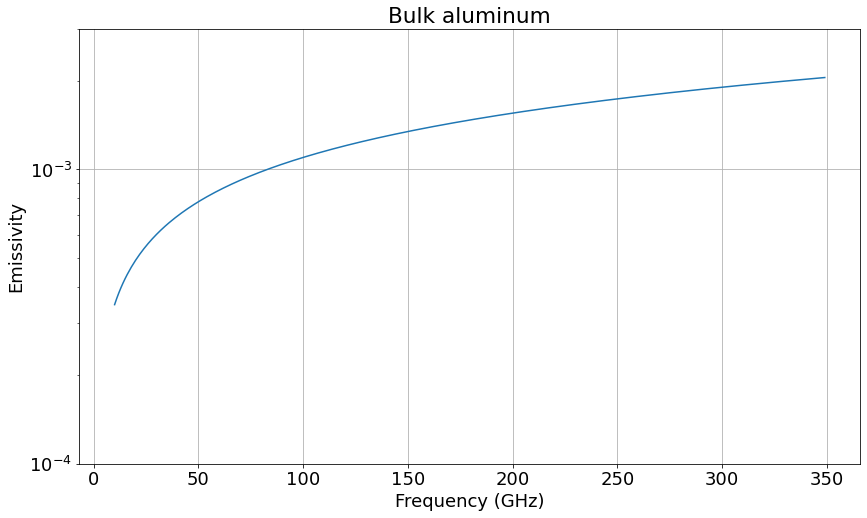

In [20]:
%matplotlib inline
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [14, 8]

eps0 = 8.85e-12
c = 3e8

sigma_c = 36.9e6 # Siemens/m, from https://www.tibtech.com/conductivite.php?lang=en_US
nu_ghz = np.arange(10,350)
nu = 1e9*nu_ghz

def alum_emiss(nu1):
    emiss = np.sqrt(16*np.pi*eps0*nu1/sigma_c)
    return emiss

emiss = alum_emiss(nu)


plt.semilogy(nu_ghz,emiss)
plt.xlabel('Frequency (GHz)')
plt.ylabel('Emissivity')
plt.ylim([1e-4,3e-3])
plt.title('Bulk aluminum')
plt.grid()

for nug in [20,30,40,95,150,220,280]:
    nu = 1e9*nug
    emiss = alum_emiss(nu)
    print('{0:6d} GHz:  emiss = {1:5.2e}'.format(nug,emiss))

# Ruze scattering

Small scale surface roughnesses in our mirrors will cause scattering, the total amount of which is implicit for Ruze's formula for forward gain,

$$ G(\nu) = G_0 \exp{\left[ -\left(\frac{4 \pi \sigma_r}{ \lambda}\right)^2 \right]} $$, 

where $G_0$ is the forward gain with no scattering and $\sigma_r$ is the surface roughness. Therefore, the fraction of power lost to scattering is

$$ \delta (\nu) = 1 - \exp{\left[ -\left(\frac{4 \pi \sigma_r}{ \lambda}\right)^2 \right]} $$.



    20 GHz:  loss = 7.02e-05
    30 GHz:  loss = 1.58e-04
    40 GHz:  loss = 2.81e-04
    95 GHz:  loss = 1.58e-03
   150 GHz:  loss = 3.94e-03
   220 GHz:  loss = 8.46e-03
   280 GHz:  loss = 1.37e-02


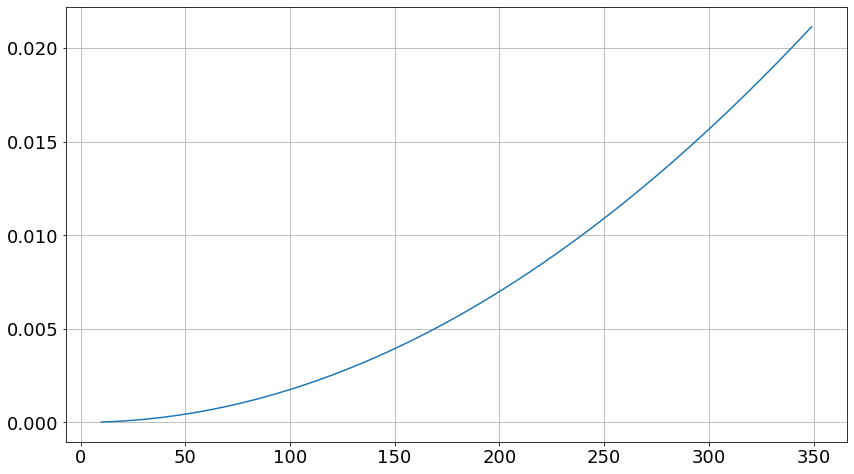

In [28]:
sigma_r = 10e-6;  # 10 microns per mirror
nu_ghz = np.arange(10,350)
nu = 1e9*nu_ghz
c = 3e8
lamb = c/nu

def scatt_loss(lamb1):
    delta1 = 1- np.exp( -(4*np.pi*sigma_r/lamb1)**2 )
    return delta1

delta = scatt_loss(lamb)
plt.plot(nu_ghz,delta)
plt.grid()

for nug in [20,30,40,95,150,220,280]:
    nu = 1e9*nug
    lamb = c/nu
    emiss = scatt_loss(lamb)
    print('{0:6d} GHz:  loss = {1:5.2e}'.format(nug,emiss))